In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../seismiqb/src/')

In [3]:
from synthetic import make_synthetic, SyntheticGenerator

* using `SyntheticGenerator`-class and chain of actions

In [11]:
gen = SyntheticGenerator(seed=100)

In [12]:
gen = (gen.generate_velocities(num_reflections=100,
                               horizon_heights=(0.2, 0.3, 0.5, 0.8),
                               horizon_jumps=(-5, 5, 6, 8))
          .generate_velocity_model((200, 800), (10, ))
          .add_faults(faults=(((100, 100), (100, 220)),
                              ((150, 600), (150, 720))),
                      peak_value=0.15, zeros_share=0.4)
          .generate_density_model()
          .generate_synthetic()
          .postprocess_synthetic(noise_mul=0.2))

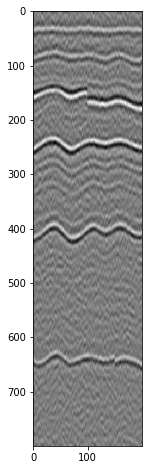

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(gen.synthetic.T, cmap=plt.cm.gray)

* using `make_synthetic`-wrapper

In [14]:
synt2d, _ = make_synthetic(shape=(200, 800), grid_shape=10, num_reflections=100,
                           horizon_heights=(0.2, 0.3, 0.5, 0.8),
                           horizon_jumps=(-5, 5, 6, 8),
                           faults=(((100, 100), (100, 220)),
                                   ((150, 600), (150, 720))),
                           peak_value=0.15, zeros_share_faults=0.4, seed=100, noise_mul=0.2)

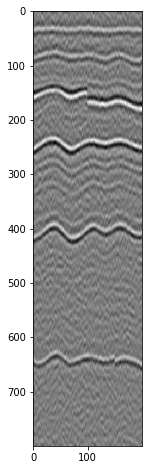

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(synt2d.T, cmap=plt.cm.gray)